In [3]:
import numpy as np
from functools import partial
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

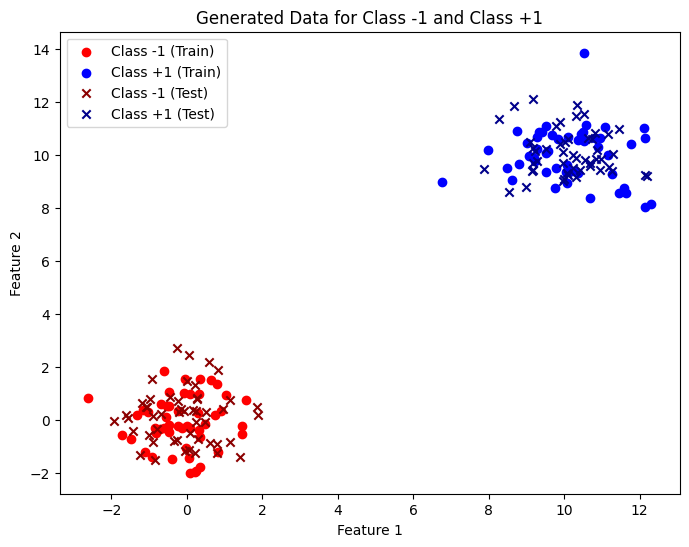

In [4]:
# Parameters for the normal distributions
mu1 = [0, 0]  # Mean for class -1
mu2 = [10, 10]  # Mean for class +1
sigma = np.eye(2)  # Identity matrix as the covariance matrix (σ = I)

np.random.seed(42)

# Generate 100 data points for each class
class_minus_1_train = np.random.multivariate_normal(mu1, sigma, 50)  # 50 points for training class -1
class_minus_1_test = np.random.multivariate_normal(mu1, sigma, 50)   # 50 points for testing class -1

class_plus_1_train = np.random.multivariate_normal(mu2, sigma, 50)   # 50 points for training class +1
class_plus_1_test = np.random.multivariate_normal(mu2, sigma, 50)    # 50 points for testing class +1

# Combine the training and test sets
X_train = np.vstack((class_minus_1_train, class_plus_1_train))  # Training data
X_test = np.vstack((class_minus_1_test, class_plus_1_test))    # Test data

# Create the corresponding labels for training and test sets
y_train = np.concatenate((np.ones(50) * -1, np.ones(50)))  # Labels: -1 for class -1, +1 for class +1
y_test = np.concatenate((np.ones(50) * -1, np.ones(50)))   # Labels for test data

# Optional: Plot the generated data to visualize the distribution
plt.figure(figsize=(8, 6))
plt.scatter(class_minus_1_train[:, 0], class_minus_1_train[:, 1], color='red', label='Class -1 (Train)')
plt.scatter(class_plus_1_train[:, 0], class_plus_1_train[:, 1], color='blue', label='Class +1 (Train)')
plt.scatter(class_minus_1_test[:, 0], class_minus_1_test[:, 1], color='darkred', label='Class -1 (Test)', marker='x')
plt.scatter(class_plus_1_test[:, 0], class_plus_1_test[:, 1], color='darkblue', label='Class +1 (Test)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Data for Class -1 and Class +1')
plt.show()

In [5]:
def classify(X, y, maxitercnt=10000):
    rows, cols = X.shape
    nv = nw = 0
    v = w = np.zeros(cols + 1)
    itercnt = 0
    ones_column = np.ones((X.shape[0], 1))
    new_X = np.hstack((ones_column, X))
    np.random.seed(42)
    while itercnt <= maxitercnt:
        random_index = np.random.choice(rows)
        xj, yj = new_X[random_index], y[random_index]
        yhat = 1 if np.dot(v, xj) >= 0 else -1

        if yhat * yj > 0:
            nv += 1
        else:
            if nv > nw:
                w = v
                nw = nv
            
            v += yj * xj
            nv = 0
        
        itercnt += 1

    return w

# def classify(X, y, maxitercnt=10000):
#     rows, cols = X.shape
#     v = np.zeros(cols + 1)  # Initialize weights (including bias)
#     w = np.zeros(cols + 1)  # Best weights found
#     best_accuracy = 0
#     ones_column = np.ones((X.shape[0], 1))
#     new_X = np.hstack((ones_column, X))  # Add bias term

#     np.random.seed(42)

#     for itercnt in range(maxitercnt):
#         random_index = np.random.choice(rows)
#         xj, yj = new_X[random_index], y[random_index]
#         yhat = np.sign(np.dot(v, xj))

#         # Update weights if there's a misclassification
#         if yhat != yj:
#             v += yj * xj

#         # Evaluate current weight vector on the full dataset
#         predictions = np.sign(np.dot(new_X, v))
#         accuracy = np.mean(predictions == y)

#         # If this weight vector performs better, save it
#         if accuracy > best_accuracy:
#             w = v.copy()
#             best_accuracy = accuracy

#     return w



# weights = classify(X_train, y_train)
# weights

In [7]:
def predict(X, weights):
    arr = np.dot(X, weights[1:]) + weights[0]
    return np.sign(arr)


#### Adaboost

In [353]:
# def adabtrain(X_train, y_train, k=1):
#     rows, _ = X_train.shape
#     weights = np.full(rows, 1/rows)
#     alphas = []
#     hypotheses = []
#     for t in range(k):
#         # Select new training set
#         np.random.seed(t)
#         resampled_indices = np.random.choice(
#             np.arange(rows), size=rows, replace=True, p=weights)
#         X_resampled = X_train[resampled_indices]
#         y_resampled = y_train[resampled_indices]

#         # train weak learner to get hypothesis
#         w = classify(X_resampled, y_resampled)
#         hypothesis = partial(predict, weights=w)
#         hypotheses.append(hypothesis)
#         hyp_training = hypothesis(X_resampled)

#         # compute training error
#         delta = (hyp_training != y_resampled).astype(int)
#         epsilon = np.sum(weights[resampled_indices] * delta)

#         # compute coefficient
#         alpha = 0.5 * np.log((1 - epsilon) / epsilon)
#         alphas.append(alpha)

#         # compute new sample weight
#         single_wt_upd = weights * np.exp(-alpha * y_train * hyp_training)
#         z = np.sum(single_wt_upd)
#         weights = single_wt_upd / z

#         print(f'Iteration {t}: Weak learner accuracy: {(hyp_training == y_train).astype(int).sum() / len(y_train)}')
#         print(f'Iteration {t}: Epsilon = {epsilon}')
#         print(f'Iteration {t}: Alpha = {alpha}')
#         print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

#     alphas = np.array(alphas)
#     hypotheses = np.array(hypotheses)
#     return alphas, hypotheses


In [8]:
def adabtrain(X_train, y_train, k=100):
    rows, _ = X_train.shape
    weights = np.full(rows, 1/rows)
    alphas = []
    hypotheses = []
    for t in range(k):
        if t != 0:
            np.random.seed(t)
            resampled_indices = np.random.choice(
                np.arange(rows), size=rows, replace=True, p=weights)
            X_resampled = X_train[resampled_indices]
            y_resampled = y_train[resampled_indices]
        else:
            X_resampled, y_resampled = X_train, y_train

        w = classify(X_resampled, y_resampled)
        hypothesis = partial(predict, weights=w)
        hypotheses.append(hypothesis)
        prediction = hypothesis(X_train)

        # compute training error
        delta = (prediction != y_train).astype(int)
        epsilon = np.dot(weights, delta)

        # compute coefficient
        alpha = 0.5 * np.log((1 - epsilon) / epsilon)
        alphas.append(alpha)

        # compute the new weights
        single_wt_upd = weights * np.exp(-alpha * y_train * prediction)
        z = np.sum(single_wt_upd)
        weights = single_wt_upd / z

        print(f'Iteration {t}: Weak learner accuracy: {(prediction == y_train).astype(int).sum() / len(y_train)}')
        print(f'Iteration {t}: Epsilon = {epsilon}')
        print(f'Iteration {t}: Alpha = {alpha}')
        print(f'Weights for iter {t}: {w}')
        print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

    alphas = np.array(alphas)
    hypotheses = np.array(hypotheses)
    return alphas, hypotheses


# def adabtrain(X_train, y_train, k=100):
#     rows, _ = X_train.shape
#     weights = np.full(rows, 1/rows)  # Initialize sample weights
#     alphas = []
#     hypotheses = []
    
#     for t in range(k):
#         # Resampling: If it's the first iteration, use the whole dataset.
#         if t != 0:
#             resampled_indices = np.random.choice(
#                 np.arange(rows), size=rows, replace=True, p=weights)
#             X_resampled = X_train[resampled_indices]
#             y_resampled = y_train[resampled_indices]
#         else:
#             X_resampled, y_resampled = X_train, y_train

#         # Train weak learner (e.g., perceptron or another classifier)
#         w = classify(X_resampled, y_resampled)
        
#         # Create the hypothesis using the weak learner's weights
#         hypothesis = partial(predict, weights=w)
#         hypotheses.append(hypothesis)
        
#         # Predict using the resampled data
#         prediction = hypothesis(X_resampled)

#         # Compute training error (epsilon)
#         delta = (prediction != y_resampled).astype(int)
#         epsilon = np.dot(weights, delta)

#         # Compute the alpha coefficient
#         alpha = 0.5 * np.log((1 - epsilon) / epsilon)
#         alphas.append(alpha)

#         # Compute the new sample weights (update rule)
#         single_wt_upd = weights * np.exp(-alpha * y_resampled * prediction)
#         z = np.sum(single_wt_upd)
#         weights = single_wt_upd / z  # Normalize the weights

#         # Print the weak learner's accuracy, error, and weight updates
#         print(f'Iteration {t}: Weak learner accuracy: {(prediction == y_resampled).astype(int).sum() / len(y_resampled)}')
#         print(f'Iteration {t}: Epsilon = {epsilon}')
#         print(f'Iteration {t}: Alpha = {alpha}')
#         print(f'Weights for iter {t}: {w}')
#         print(f'Sum of weights after normalization for iter {t}: {np.sum(weights)}')

#     alphas = np.array(alphas)
#     hypotheses = np.array(hypotheses)
    
#     return alphas, hypotheses


In [9]:
def adabpredict(X_test, alphas, hypotheses):
    # Compute the weighted sum of weak learner predictions
    weak_preds = np.array([h(X_test) for h in hypotheses])  # Shape: (k, N_test)
    final_preds = np.sign(np.dot(alphas, weak_preds))  # Shape: (N_test,)
    return final_preds

In [10]:
banana = np.loadtxt('banana_data.csv', delimiter=',')
X_banana, y_banana = banana[:, 1:], banana[:, 0]
X_banana_train, X_banana_test, y_banana_train, y_banana_test = train_test_split(X_banana, y_banana, train_size=400, test_size=4900)
# X_banana_train, y_banana_train = X_banana[:400], y_banana[:400]
# X_banana_test, y_banana_test = X_banana[400:], y_banana[400:]

In [371]:
test = classify(X_banana_train, y_banana_train)
result = predict(X_banana_test, test)
(result == y_banana_test).astype(int).sum() / len(y_banana_test)

np.float64(0.606938775510204)

In [15]:
alphas, hypotheses = adabtrain(X_banana_train, y_banana_train, 1000)
banana_results = adabpredict(X_banana_test, alphas, hypotheses)
(banana_results == y_banana_test).astype(int).sum() / len(y_banana_test)
# banana_results

Iteration 0: Weak learner accuracy: 0.455
Iteration 0: Epsilon = 0.5449999999999999
Iteration 0: Alpha = -0.0902441878561467
Weights for iter 0: [ 0.          1.08516602 -0.38373462]
Sum of weights after normalization for iter 0: 1.0
Iteration 1: Weak learner accuracy: 0.53
Iteration 1: Epsilon = 0.4665792922673657
Iteration 1: Alpha = 0.0669412272952821
Weights for iter 1: [1.         0.52065492 1.33537144]
Sum of weights after normalization for iter 1: 0.9999999999999998
Iteration 2: Weak learner accuracy: 0.465
Iteration 2: Epsilon = 0.4999367566081049
Iteration 2: Alpha = 0.00012648678446476488
Weights for iter 2: [ 0.          1.08034651 -0.28972851]
Sum of weights after normalization for iter 2: 1.0
Iteration 3: Weak learner accuracy: 0.57
Iteration 3: Epsilon = 0.41474380701273794
Iteration 3: Alpha = 0.1721943454964054
Weights for iter 3: [-2.          0.55696943 -1.24960537]
Sum of weights after normalization for iter 3: 1.0
Iteration 4: Weak learner accuracy: 0.4825
Iteration

np.float64(0.8820408163265306)

In [ ]:
splice = np.loadtxt('splice_data.csv', delimiter=',')
X_splice, y_splice = splice[:, 1:], splice[:, 0]
X_splice_train, X_splice_test, y_splice_train, y_splice_test = train_test_split(X_splice, y_splice, train_size=816, test_size=2175)

In [375]:
alphas_splice, hypotheses_splice = adabtrain(X_splice_train, y_splice_train, 1000)
splice_results = adabpredict(X_splice_test, alphas_splice, hypotheses_splice)
(splice_results == y_splice_test).astype(int).sum() / len(y_splice_test)

Iteration 0: Weak learner accuracy: 0.8860294117647058
Iteration 0: Epsilon = 0.1139705882352941
Iteration 0: Alpha = 1.0254048645027545
Weights for iter 0: [ -11.   36.   -5.    4.  -33.   10.   15.   -9.   17.   21.   -8.   18.
   -5.  -18.   19.   57.   48.   31.   11.   19.   32.    7.   43.   29.
    2.   54.   35.  -42.   59. -150.  -98.  -75.  130.  -51. -114.  -57.
   52.  -36.   14.  -18.   26.   15.   15.   -3.  -10.   -6.    2.    9.
  -33.  -11.  -49.  -26.  -17.  -38.   -5.  -17.  -10.   -6.   16.    0.
   -7.]
Sum of weights after normalization for iter 0: 1.0
Iteration 1: Weak learner accuracy: 0.7696078431372549
Iteration 1: Epsilon = 0.2986659527952528
Iteration 1: Alpha = 0.42682928447848284
Weights for iter 1: [-27. -13. -29.   6.   6. -16.  15. -14.  37.  -8.  20.  41.  11. -69.
  18.  34.  16.   5.  42.  -5.   7.  25.  -3.  65. -52. -16.  61.  32.
  71. -53. -88. -52.  89. -23. -63. -31.  63. -11. -33.   1.  25.   4.
 -10. -18.   1. -30.  22. -10.  12. -60.   2. -5

np.float64(0.8179310344827586)

In [384]:
alphas_splice, hypotheses_splice = adabtrain(X_splice_train, y_splice_train, 1)
splice_results = adabpredict(X_splice_test, alphas_splice, hypotheses_splice)
(splice_results == y_splice_test).astype(int).sum() / len(y_splice_test)

Iteration 0: Weak learner accuracy: 0.8860294117647058
Iteration 0: Epsilon = 0.1139705882352941
Iteration 0: Alpha = 1.0254048645027545
Weights for iter 0: [ -11.   36.   -5.    4.  -33.   10.   15.   -9.   17.   21.   -8.   18.
   -5.  -18.   19.   57.   48.   31.   11.   19.   32.    7.   43.   29.
    2.   54.   35.  -42.   59. -150.  -98.  -75.  130.  -51. -114.  -57.
   52.  -36.   14.  -18.   26.   15.   15.   -3.  -10.   -6.    2.    9.
  -33.  -11.  -49.  -26.  -17.  -38.   -5.  -17.  -10.   -6.   16.    0.
   -7.]
Sum of weights after normalization for iter 0: 1.0


np.float64(0.8055172413793104)

Class=-1, n=1647 (55.065%)
Class=1, n=1344 (44.935%)


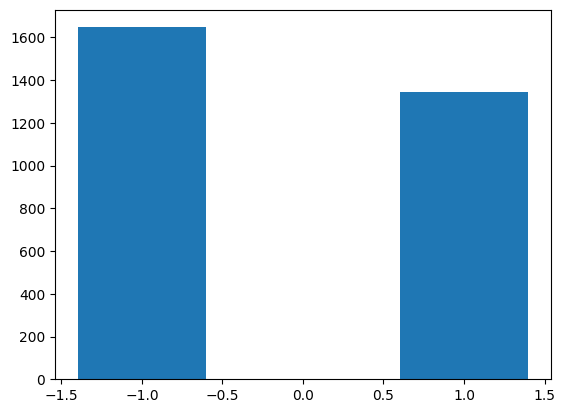

In [387]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_splice)
for k,v in counter.items():
	per = v / len(y_splice) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [283]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

adb = AdaBoostClassifier()
model = adb.fit(X_splice_train, y_splice_train)
y_pred = model.predict(X_splice_test)
print(confusion_matrix(y_splice_test, y_pred))
print(classification_report(y_splice_test, y_pred))
print(accuracy_score(y_splice_test, y_pred))


[[986  61]
 [ 98 846]]
              precision    recall  f1-score   support

        -1.0       0.91      0.94      0.93      1047
         1.0       0.93      0.90      0.91       944

    accuracy                           0.92      1991
   macro avg       0.92      0.92      0.92      1991
weighted avg       0.92      0.92      0.92      1991

0.9201406328478152


/home/aleisley/venvs/ai201/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [282]:

adb = AdaBoostClassifier()
model = adb.fit(X_banana_train, y_banana_train)
y_pred = model.predict(X_banana_test)
print(confusion_matrix(y_banana_test, y_pred))
print(classification_report(y_banana_test, y_pred))
print(accuracy_score(y_banana_test, y_pred))

[[1318 1478]
 [ 633 1471]]
              precision    recall  f1-score   support

        -1.0       0.68      0.47      0.56      2796
         1.0       0.50      0.70      0.58      2104

    accuracy                           0.57      4900
   macro avg       0.59      0.59      0.57      4900
weighted avg       0.60      0.57      0.57      4900

0.5691836734693878


/home/aleisley/venvs/ai201/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [350]:
test = classify(X_splice_train, y_splice_train, 10000)
result = predict(X_splice_test, test)
(result == y_splice_test).astype(int).sum() / len(y_splice_test)
# result.sum() / len(y_splice_test)
# result

np.float64(0.8001004520341537)

In [ ]:
test = classify(X_banana, y_splice_train)
result = predict(X_splice_test, test)
(result == y_splice_test).astype(int).sum() / len(y_splice_test)

In [388]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a synthetic dataset
# X, y = make_classification(
#     n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
# )
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define the SVM model
svc = SVC()

# 3. Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernels to try
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                  # Only relevant for 'poly' kernel
}

# 4. Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_banana_train, y_banana_train)

# 5. Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# 6. Test the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_banana_test)
test_accuracy = accuracy_score(y_banana_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
33070.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
33070.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen mo

Best Parameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Training Accuracy: 0.905
Test Accuracy: 0.8840816326530613
